In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_stock_data, logreturn
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
from IPython.display import display

from utils import load_ds1, load_ds2
import numpy as np

In [2]:
# df = load_stock_data('GE')
# lret = logreturn(df['px'], df['px'].shift(1))
# lret = lret - lret.mean()

# scaler = StandardScaler()
# normalised_returns = pd.Series(scaler.fit_transform(lret.dropna().values.reshape(-1,1)).ravel())

# vol = normalised_returns.abs()
# future_vol = vol.shift(-1).fillna(0)
#scaler = StandardScaler()
#vol = scaler.fit_transform(vol.values.reshape(-1,1))

In [3]:
data = load_ds2()

In [55]:
sym = 'SP500'
ds = data[sym]

X = ds.X_train
Y = ds.Y_train

In [56]:
vol = ds.X_train['vol']
future_vol = ds.Y_train.iloc[:,0]

In [57]:
display("vol", vol.describe())
display("future_vol", future_vol.describe())

'vol'

count    4774.000000
mean        0.007701
std         0.008500
min         0.000000
25%         0.002266
50%         0.005333
75%         0.010150
max         0.109572
Name: vol, dtype: float64

'future_vol'

count    4774.000000
mean        0.007703
std         0.008500
min         0.000000
25%         0.002266
50%         0.005335
75%         0.010166
max         0.109572
Name: target-1, dtype: float64

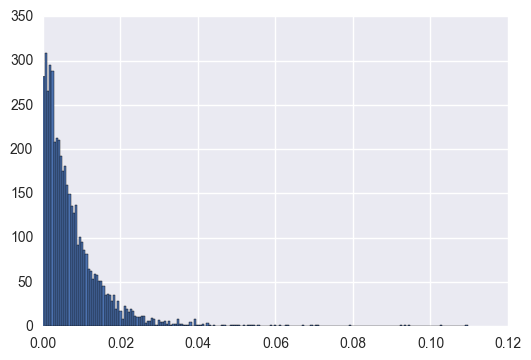

In [58]:
vol.hist(bins=200)

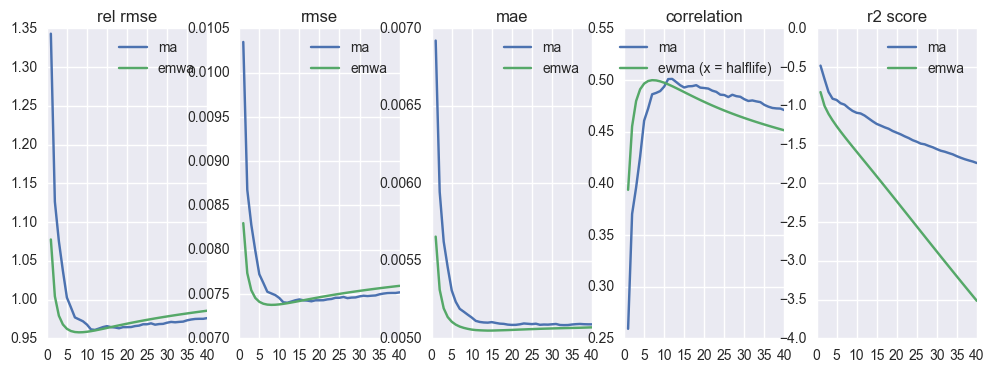

In [59]:
ps = []

ma_corr = []
ma_r2 = []
ma_rmse = []
ma_mae = []
ma_rel_rmse = []

ewma_corr = []
ewma_r2 = []
ewma_rmse = []
ewma_mae = []

ewma_rel_rmse = []

scaling_baseline = 'ma-10'
baseline = ds.X_train[scaling_baseline]

for p in np.arange(40)+1:
    ps.append(p)
    ma_col = 'ma-{}'.format(p)
    ewma_col = 'ewma-{}'.format(p)
    
    ma = ds.X_train[ma_col]
    ewma = ds.X_train[ewma_col]
    #plt.scatter(ma, vol)
    
    # scores
    ma_r2.append(r2_score(ma, future_vol))
    ma_corr.append(ma.corr(future_vol))
    
    marmse = np.sqrt(mean_squared_error(ma, future_vol))
    ma_rmse.append(marmse)
    ma_mae.append(mean_absolute_error(ma, future_vol))
    
    ma_rel_rmse.append(marmse/future_vol.mean())
    
    # TODO: scale by mean vol
    
    ewma_r2.append(r2_score(ewma, future_vol))
    ewma_corr.append(ewma.corr(future_vol))
    ewmarmse = np.sqrt(mean_squared_error(ewma, future_vol))
    ewma_rmse.append(ewmarmse)
    ewma_mae.append(mean_absolute_error(ewma, future_vol))

    ewma_rel_rmse.append(ewmarmse/future_vol.mean())

    
f, axes = plt.subplots(1,5, figsize=(12,4), sharey=False, sharex=True)

p = 0
axes[p].plot(ps, ma_rel_rmse, label='ma')
axes[p].plot(ps, ewma_rel_rmse, label='emwa')
axes[p].set_title('rel rmse')
axes[p].legend()
p+=1
axes[p].plot(ps, ma_rmse, label='ma')
axes[p].plot(ps, ewma_rmse, label='emwa')
axes[p].set_title('rmse')
axes[p].legend()
p+=1
axes[p].plot(ps, ma_mae, label='ma')
axes[p].plot(ps, ewma_mae, label='emwa')
axes[p].set_title('mae')
axes[p].legend()
p+=1
axes[p].plot(ps, ma_corr, label='ma')
axes[p].plot(ps, ewma_corr, label='ewma (x = halflife)')
axes[p].set_title('correlation')
axes[p].legend()
p+=1
axes[p].plot(ps, ma_r2, label='ma')
axes[p].plot(ps, ewma_r2, label='emwa')
axes[p].set_title('r2 score')
axes[p].legend()


In [54]:

???? extract to function calculating scores
??? fun whole over all data sets
?? get aggregate statistics

?? compute them on dev set too, to check that dev set is representative
?? then compare dev set performance from learned model.

Object `` not found.
Object `` not found.
Object `get` not found.
Object `compute` not found.
Object `then` not found.
